# Ejercicio de desbalanceo
### Autores:


*   Ignacio Ruiz Chicano
*   Juan Jesús Torralba Mateos
*   Ana Gil Molina



## Rutas

In [18]:
ruta_dataset='/content/CocheRadar.csv' # Ruta al csv del dataset

## Instalación de librerías

In [19]:
!pip install imbalanced-learn

In [20]:
!pip install scikit-multilearn

In [21]:
# Librerías necesarias

import pandas as pd
print("pandas: "+str(pd.__version__))
import matplotlib
print("matplotlib: "+str(matplotlib.__version__))
import matplotlib.pyplot as plt
import numpy as np
print("numpy: "+str(np.__version__))
import sklearn
print("sklearn: "+str(sklearn.__version__))
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from collections import Counter
import seaborn as sns
print("seaborn: "+str(sns.__version__))
import scipy.stats as stats
from sklearn.svm import LinearSVC, SVC
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, hamming_loss, make_scorer
from sklearn.tree import DecisionTreeClassifier, ExtraTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier, RadiusNeighborsClassifier
import imblearn
print("imblearn: "+str(imblearn.__version__))
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from imblearn.under_sampling import CondensedNearestNeighbour, EditedNearestNeighbours
from imblearn.over_sampling import SVMSMOTE
from imblearn.over_sampling import BorderlineSMOTE
from imblearn.over_sampling import ADASYN
from sklearn.multioutput import MultiOutputClassifier
from xgboost import XGBClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import ExtraTreesClassifier, RandomForestClassifier
from sklearn.linear_model import RidgeClassifierCV
from sklearn.model_selection import learning_curve
from scipy import stats
import joblib
print("joblib: "+str(joblib.__version__))

pandas: 2.2.2
matplotlib: 3.8.0
numpy: 1.26.4
sklearn: 1.5.2
seaborn: 0.13.2
imblearn: 0.12.4
joblib: 1.4.2


In [22]:
# Establecemos una semilla
semilla = 123
np.random.seed(semilla)

## Descripción del dataset

El dataset Radar\-Coches, es un dataset que permite distinguir a un coche de cualquier otro

vehículo en función de ciertas características que se describen en estos 18 atributos todos

numéricos:

\- Compacto

\- Circularidad

\- Distancia\_circular

\- Relación\_radio

\- Relación\_aspecto\_praxis

\- Relación\_aspecto\_longitud\_máx

\- Relación\_dispersión

\- Alargamiento

\- Praxis\_rectangular

\- Longitud\_rectangular

\- Varianza\_mayor

\- Varianza\_menor

\- Rotación\_radio

\- Asimetría\_mayor

\- Asimetría\_menor

\- Curtosis\_meno

\- Curtosis\_mayor

\- huecos

El atributo objetivo es clasificar según esos atributos el tipo del vehículos entre un coche y otros vehículos.



## Preprocesamiento y análisis

In [23]:
# Se carga el dataset
cocheRadarDF = pd.read_csv(ruta_dataset)

In [24]:
# Se muestran las primeras 5 filas
cocheRadarDF.head()

,Compacto,Circularidad,Distancia_circular,Relación_radio,Relación_aspecto_praxis,Relación_aspecto_longitud_máx,Relación_dispersión,Alargamiento,Praxis_rectangular,Longitud_rectangular,Varianza_mayor,Varianza_menor,Rotación_radio,Asimetría_mayor,Asimetría_menor,Curtosis_menor,Curtosis_mayor,huecos,tipo
0,95,48,83,178,72,10,162,42,20,159,176,379,184,70,6,16,187,197,otros
1,91,41,84,141,57,9,149,45,19,143,170,330,158,72,9,14,189,199,otros
2,104,50,106,209,66,10,207,32,23,158,223,635,220,73,14,9,188,196,coche
3,93,41,82,159,63,9,144,46,19,143,160,309,127,63,6,10,199,207,otros
4,85,44,70,205,103,52,149,45,19,144,241,325,188,127,9,11,180,183,otros


In [25]:
# Se muestra la última columna
tipo_dato = cocheRadarDF.iloc[:, -1]
print(tipo_dato)

0      otros
1      otros
2      coche
3      otros
4      otros
       ...  
841    coche
842    otros
843    coche
844    coche
845    otros
Name: tipo, Length: 846, dtype: object


In [26]:
# Se muestran los tipos de los datos, no hay variables categóricas
cocheRadarDF.dtypes

,0
Compacto,int64
Circularidad,int64
Distancia_circular,int64
Relación_radio,int64
Relación_aspecto_praxis,int64
Relación_aspecto_longitud_máx,int64
Relación_dispersión,int64
Alargamiento,int64
Praxis_rectangular,int64
Longitud_rectangular,int64


Todas las varaibles (sin contar la objetivo) son variables numéricas. Es decir, no hay ninguna categórica.

In [27]:
# Se comprueba si hay nulos. Como se ve, no hay ninguno
cocheRadarDF.info()
cocheRadarDF.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 846 entries, 0 to 845
Data columns (total 19 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   Compacto                       846 non-null    int64 
 1   Circularidad                   846 non-null    int64 
 2   Distancia_circular             846 non-null    int64 
 3   Relación_radio                 846 non-null    int64 
 4   Relación_aspecto_praxis        846 non-null    int64 
 5   Relación_aspecto_longitud_máx  846 non-null    int64 
 6   Relación_dispersión            846 non-null    int64 
 7   Alargamiento                   846 non-null    int64 
 8   Praxis_rectangular             846 non-null    int64 
 9   Longitud_rectangular           846 non-null    int64 
 10  Varianza_mayor                 846 non-null    int64 
 11  Varianza_menor                 846 non-null    int64 
 12  Rotación_radio                 846 non-null    int64 
 13  Asime

,0
Compacto,0
Circularidad,0
Distancia_circular,0
Relación_radio,0
Relación_aspecto_praxis,0
Relación_aspecto_longitud_máx,0
Relación_dispersión,0
Alargamiento,0
Praxis_rectangular,0
Longitud_rectangular,0


No hay ningún valor nulo.

In [28]:
#Contamos los valores de cada clase para ver si es un dataset balanceado o no
cocheRadarDF['tipo'].value_counts()

,count
tipo,
otros,629
coche,217


Como se puede apreciar, hay un gran desbalanceo en el dataset. Aproximadamente el 75% de los ejemplos corresponden al tipo "otros", mientras que el 25% corresponde al tipo "coche".


In [29]:
# Mapeamos a valores numéricos los datos de clase (el tipo de vehículo que queremos saber)
# 0 para coche, 1 para otros
cocheRadarDF['tipo'] = cocheRadarDF['tipo'].map({'coche': 0, 'otros': 1})

<Axes: >

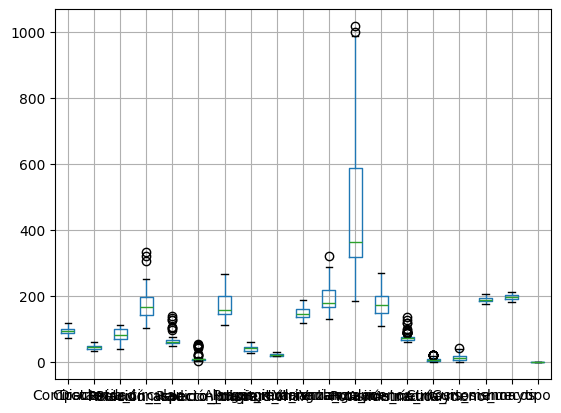

In [30]:
# Comprobamos si los datos se deben normalizar y si hay outliers
cocheRadarDF.boxplot()

Se puede apreciar que claramente hay que normalizar y que hay algunos outliers. Estos outliers van a ser eliminados ya que al ser tan pocos pueden proceder de ruido o de errores al tomar los datos. Al tratarse de tan pocos outliers, se ha decidido simplemente eliminarlos.

In [31]:
# Se sacan los outliers
z_scores = np.abs(stats.zscore(cocheRadarDF))
outliers = (z_scores > 3)


# Obtener los índices de outliers
outlier_indices = np.where(outliers.any(axis=1))[0]
print(f"Número de outliers detectados: {len(outlier_indices)}")

# Eliminar outliers
cocheRadarDF = np.delete(cocheRadarDF, outlier_indices, axis=0)
cocheRadarDF = pd.DataFrame(cocheRadarDF)
tipo_dato = cocheRadarDF.iloc[:, -1]
tipo_dato.value_counts()

Número de outliers detectados: 22


,count
18,
1,613
0,211


Solo hay 22 outliers que superan el umbral establecido como fuera de lo normal. Estos outliers son eliminados ya que son pocos. Como se puede ver, la clase minoritaria no se ve muy perjudicada por esta limpieza de outliers.

<Axes: >

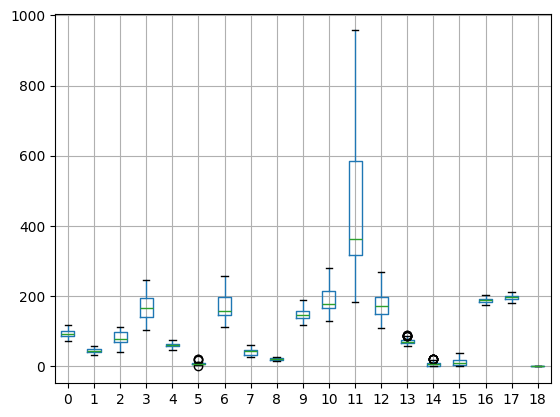

In [32]:
# Se muestra de nuevo el boxplot para ver que efectivamente se han eliminado los outliers
cocheRadarDF.boxplot()

In [33]:
# Se obtiene la correlación
correlacion = cocheRadarDF.corr()

correlacion

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
0,1.000000,0.686904,0.789925,0.753394,0.218953,0.463299,0.808747,-0.784700,0.809381,0.673168,0.789502,0.815735,0.574156,-0.294756,0.218020,0.159400,0.318423,0.396095,-0.257661
1,0.686904,1.000000,0.795123,0.651655,0.219576,0.537770,0.857775,-0.824824,0.856276,0.966257,0.817604,0.851153,0.934943,0.032401,0.146578,-0.013973,-0.096542,0.066716,-0.073364
2,0.789925,0.795123,1.000000,0.819018,0.265067,0.626352,0.909910,-0.911090,0.899126,0.771263,0.890892,0.894810,0.701292,-0.288238,0.108874,0.267744,0.162855,0.360044,-0.250286
3,0.753394,0.651655,0.819018,1.000000,0.674831,0.441381,0.803408,-0.852370,0.777422,0.586341,0.810922,0.795911,0.561797,-0.428077,0.053584,0.188405,0.433186,0.521186,-0.238289
4,0.218953,0.219576,0.265067,0.674831,1.000000,0.164818,0.227200,-0.323611,0.195109,0.165760,0.248567,0.216977,0.178683,-0.316458,-0.049207,-0.028072,0.399447,0.412577,0.007317
5,0.463299,0.537770,0.626352,0.441381,0.164818,1.000000,0.483571,-0.485399,0.482204,0.618196,0.415393,0.450326,0.400522,-0.300865,0.079103,0.140084,0.047630,0.359678,-0.157515
6,0.808747,0.857775,0.909910,0.803408,0.227200,0.483571,1.000000,-0.974936,0.991773,0.810802,0.980823,0.996578,0.792838,-0.046941,0.065862,0.212965,0.026674,0.157112,-0.203523
7,-0.784700,-0.824824,-0.911090,-0.852370,-0.323611,-0.485399,-0.974936,1.000000,-0.952147,-0.772548,-0.969862,-0.959813,-0.760751,0.131661,-0.047040,-0.186956,-0.130453,-0.245100,0.204251
8,0.809381,0.856276,0.899126,0.777422,0.195109,0.482204,0.991773,-0.952147,1.000000,0.814829,0.967111,0.992066,0.790277,-0.030985,0.073304,0.215228,0.000456,0.136805,-0.208839
9,0.673168,0.966257,0.771263,0.586341,0.165760,0.618196,0.810802,-0.772548,0.814829,1.000000,0.755310,0.799928,0.866587,0.010493,0.135245,0.002244,-0.093517,0.099819,-0.035578


Se podría hacer una reducción de características ya que hay algunas correlaciones que superan el 0.90. No obstante, se ha decidido no hacer una reducción de características ya que los resultados no variaban mucho entre sí si se hacía o no, y en algunos casos incluso ha dado resultados peores.

## División en conjunto Train y Test



In [34]:
X_train_cocheRadarDF, X_test_cocheRadarDF, y_train_cocheRadarDF, y_test_cocheRadarDF = train_test_split(cocheRadarDF.iloc[:, :-1], cocheRadarDF.iloc[:, -1], test_size=0.2, random_state=semilla)

Se ha hecho una división en Train y Test tomando un 0.2 para test. Es decir, el 80% de los datos van para Train y el 20% para Test. Este conjunto de Test será el usado en todas las pruebas de tests de los modelos. Esto se hace para que todos los modelos sean evaluados con exactamente el mismo test. Esto incluye además, que no se le van a aplicar técnicas de balanceo a este conjunto, ya que los datos artificiales del balancea pueden influir en la comparación de los modelos, de esto modo nos aseguramos que los modelos sean evaluados con los mismos datos.

## Normalización



In [35]:
# Normalizamos los datos
scaler = StandardScaler()
# Ajustamos el escalador con los datos de entrenamiento y los escalamos
X_train_cocheRadarDF_escaladas = pd.DataFrame(scaler.fit_transform(X_train_cocheRadarDF), columns=X_train_cocheRadarDF.columns)
# Aplicamos la misma transformación al conjunto de test
X_test_cocheRadarDF_escaladas = pd.DataFrame(scaler.transform(X_test_cocheRadarDF), columns=X_test_cocheRadarDF.columns)

## Técnicas de desbalanceo utilizadas

Las técnicas de desbalanceo utilizadas son de oversampling. Con esto se pretende, mediante diferentes formas, crear datos sintéticos para compensar el desbalanceo del dataset. Se ha descartado las técnicas de undersampling debido a que vemos contraproducente reducir tanto el tamaño del dataset y muy seguramente los modelos producidos serían más precarios.

Las técnicas de oversampling utilizadas son:


*   SMOTE
*   Borderline-SMOTE
*   ADASYN
*   Borderline-SMOTE SVM

Una vez obtenidos todos los modelos con estas técnicas, se hará una comparación y un análisis de resultados para saber cuál sería la mejor técnica y cuál la peor.



## Modelos de validación utilizados

Al tratarse de un modelo de clasificación se utilizarán modelos de validación basados en clasificación. Se va a intentar obtener el mejor modelo comparando diferentes modelos de validación, por ello se han utilizado modelos que funcionan de forma diferente.
Los modelos de validación utilizados son:


*   SVM
*   Árbol de decisión
*   Red neuronal
*   K-Vecinos



## Métricas utilizadas

Estamos ante un problema de clasificación, por tanto debemos de utilizar métricas de clasificación. Estas métricas se basan en la clasificación que hace el modelo con respecto a la clase real.
Las métricas utilizadas son las siguientes:


*   Accuracy: Indica las predicciones correctas sobre el total de predicciones.
*   F1-Score: Es la media armónica entre Recall y Precision.
*   Precision: Indica la proporción de las predicciones positivas que realmente son positivas.
*   Recall: Indica la proporción de las predicciones positivas que se han detectado correctamente.

Hay que tener en cuenta que Accuracy no es una métrica fiable en los problemas de desbalanceo. Esto se debe a que no tiene en cuenta la distribución de las clases y podría ignorar la clase minoritaria obteniendo aún así un alto resultado. En su lugar se va a utilizar F1-Score, ya que al tratarse de la media armónica de Recall y Precision, ofrecerá una evaluación más equilibrada.



## Modelos antes de balancear

Se van a entrenar los modelos del dataset actual, sin ninguna técnica de balanceo, para ver los resultados que daría el modelo sin aplicar ninguna técnica de balanceo. Posteriormente, estos resultados nos serán útiles para compararlos con los de los modelos balanceados. Además, nos ayudará a analizar la cuestión: _¿Es posible tratar un problema de desbalanceo con técnicas que no tienen en cuenta el desbalanceo?_



### SVM



In [36]:
param_grid_SVM_CR = {
    'C': [0.1, 1, 10, 100, 300],  # Regularización
    'loss': ['hinge', 'squared_hinge'],  # Función de pérdida
    'max_iter': [1000, 5000, 10000, 50000]  # Número máximo de iteraciones
}

# Definición del modelo
modelo_SVM_CR_grid = LinearSVC(random_state=semilla)

# Obtención de la mejor configuración de hiperparámetros del grid, utiliza validación cruzada
modelo_SVM_CR = GridSearchCV(estimator=modelo_SVM_CR_grid, param_grid=param_grid_SVM_CR, cv=5)

# Entrenar el modelo
modelo_SVM_CR.fit(X_train_cocheRadarDF_escaladas, y_train_cocheRadarDF)

# Imprimir los mejores hiperparámetros encontrados
print("Mejores hiperparámetros:", modelo_SVM_CR.best_params_)

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  w

Mejores hiperparámetros: {'C': 0.1, 'loss': 'squared_hinge', 'max_iter': 1000}


/usr/local/lib/python3.10/dist-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


In [37]:
# Realizar las predicciones
y_pred_train = modelo_SVM_CR.predict(X_train_cocheRadarDF_escaladas)
y_pred = modelo_SVM_CR.predict(X_test_cocheRadarDF_escaladas)

# Calcular las métricas
accuracy = accuracy_score(y_test_cocheRadarDF, y_pred)
f1 = f1_score(y_test_cocheRadarDF, y_pred)
precision = precision_score(y_test_cocheRadarDF, y_pred)
sensibilidad_recall = recall_score(y_test_cocheRadarDF, y_pred)
f1_train = f1_score(y_train_cocheRadarDF, y_pred_train)

In [38]:
# Imprimir los resultados de las métricas
print("F1 Train: " +str(f1_train))
print("F1 Test: " +str(f1))
print("Accuracy: "+str(accuracy))
print("Precision: "+str(precision))
print("Recall: "+str(sensibilidad_recall))

F1 Train: 0.8803088803088803
F1 Test: 0.8547717842323651
Accuracy: 0.7878787878787878
Precision: 0.8442622950819673
Recall: 0.865546218487395


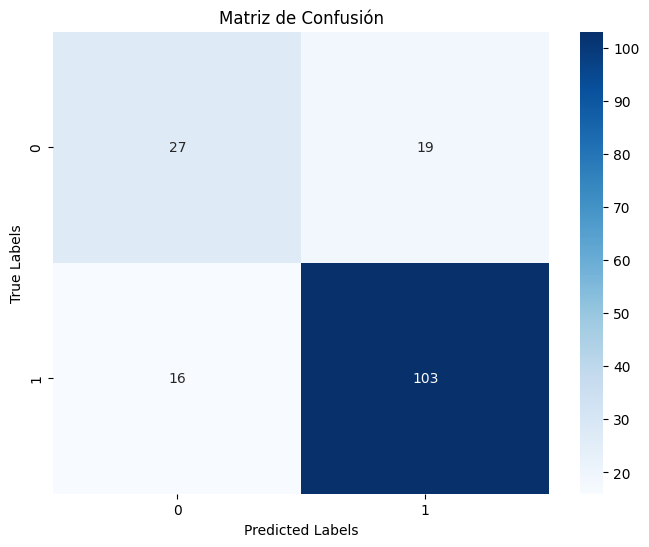

In [39]:
# Mostramos la matriz de confusín (0: coche, 1: otros)
cm = confusion_matrix(y_test_cocheRadarDF, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Matriz de Confusión')
plt.show()

### Árbol de decisión



Mejores hiperparámetros: {'criterion': 'gini', 'max_depth': 2, 'min_samples_leaf': 2, 'min_samples_split': 2}
F1 Train: 0.8762603116406966
F1 Test: 0.8604651162790697
Accuracy: 0.7818181818181819
Precision: 0.7985611510791367
Recall: 0.9327731092436975


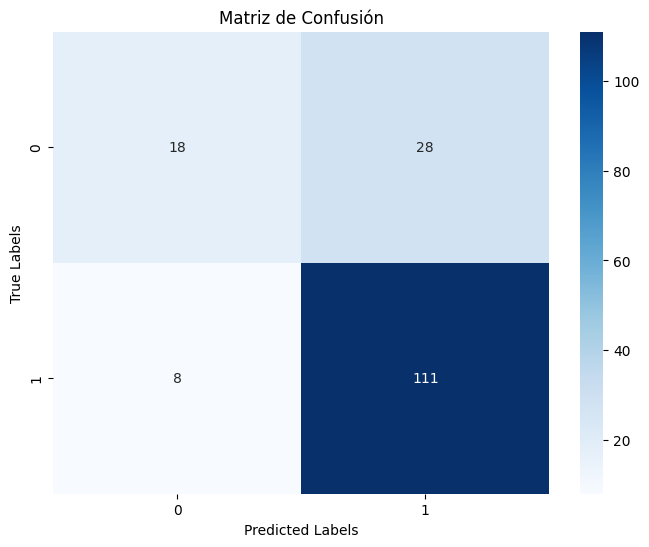

In [40]:
param_grid_AD = {
    'max_depth': [2], # Profundidad máxima
    "min_samples_split": [2, 3, 4], # Muestras mínimas para dividir un nodo
    "min_samples_leaf": [2, 3, 4], # Muestras mínimas que debe tener el nodo hoja
    'criterion': ['gini']  # Criterio
}

# Definición del modelo
modelo_AD_CR_grid = DecisionTreeClassifier(random_state=semilla)

# Obtención de la mejor configuración de hiperparámetros del grid, utiliza validación cruzada
modelo_AD_CR = GridSearchCV(estimator=modelo_AD_CR_grid,param_grid=param_grid_AD,cv=5)

# Ajustar el modelo usando GridSearchCV
modelo_AD_CR.fit(X_train_cocheRadarDF_escaladas, y_train_cocheRadarDF)

# Entrenar el modelo
modelo_AD_CR.fit(X_train_cocheRadarDF_escaladas, y_train_cocheRadarDF)

# Mostrar los mejores hiperparámetros
print("Mejores hiperparámetros:", modelo_AD_CR.best_params_)

# Realizar las predicciones
y_pred_train = modelo_AD_CR.predict(X_train_cocheRadarDF_escaladas)
y_pred = modelo_AD_CR.predict(X_test_cocheRadarDF_escaladas)

# Calcular las métricas
accuracy = accuracy_score(y_test_cocheRadarDF, y_pred)
f1 = f1_score(y_test_cocheRadarDF, y_pred)
precision = precision_score(y_test_cocheRadarDF, y_pred)
sensibilidad_recall = recall_score(y_test_cocheRadarDF, y_pred)
f1_train = f1_score(y_train_cocheRadarDF, y_pred_train)

# Imprimir los resultados de las métricas
print("F1 Train: " +str(f1_train))
print("F1 Test: " +str(f1))
print("Accuracy: "+str(accuracy))
print("Precision: "+str(precision))
print("Recall: "+str(sensibilidad_recall))

# Mostramos la matriz de confusín (0: coche, 1: otros)
cm = confusion_matrix(y_test_cocheRadarDF, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Matriz de Confusión')
plt.show()

### Red Neuronal



/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (250) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (250) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (250) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (250) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptro

Mejores hiperparámetros: {'activation': 'relu', 'hidden_layer_sizes': 256, 'max_iter': 500, 'solver': 'adam'}
F1 Train: 0.9949443882709808
F1 Test: 0.8842975206611571
Accuracy: 0.8303030303030303
Precision: 0.8699186991869918
Recall: 0.8991596638655462


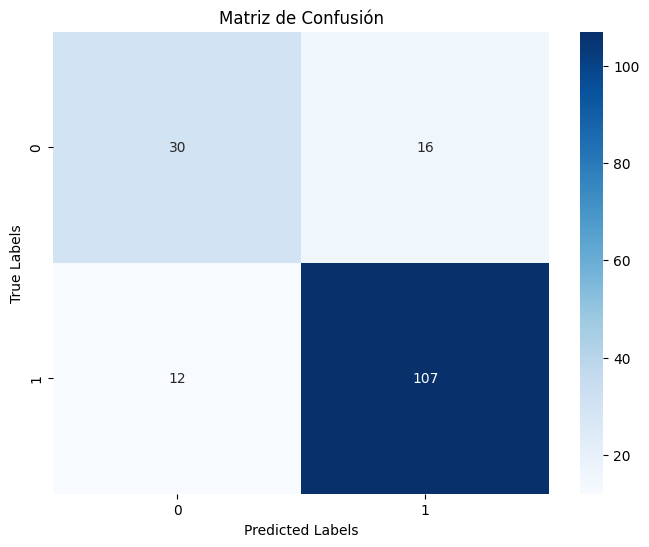

In [41]:
param_grid_RN = {
    'hidden_layer_sizes': [128, 256],  # Capa oculta
    'activation': ['logistic', 'relu'],  # Función de activación
    'solver': ['lbfgs','adam'],  # Método de optimización
    'max_iter': [250, 500]  # Número máximo de iteraciones
}

# Definición del modelo
modelo_RN_CR_grid = MLPClassifier(random_state=semilla)

# Obtención de la mejor configuración de hiperparámetros del grid, utiliza validación cruzada
modelo_RN_CR = GridSearchCV(estimator=modelo_RN_CR_grid,param_grid=param_grid_RN,cv=5)

# Entrenar el modelo
modelo_RN_CR.fit(X_train_cocheRadarDF_escaladas, y_train_cocheRadarDF)

# Mostrar los mejores hiperparámetros
print("Mejores hiperparámetros:", modelo_RN_CR.best_params_)

# Realizar las predicciones
y_pred_train = modelo_RN_CR.predict(X_train_cocheRadarDF_escaladas)
y_pred = modelo_RN_CR.predict(X_test_cocheRadarDF_escaladas)

# Calcular las métricas
accuracy = accuracy_score(y_test_cocheRadarDF, y_pred)
f1 = f1_score(y_test_cocheRadarDF, y_pred)
precision = precision_score(y_test_cocheRadarDF, y_pred)
sensibilidad_recall = recall_score(y_test_cocheRadarDF, y_pred)
f1_train = f1_score(y_train_cocheRadarDF, y_pred_train)

# Imprimir los resultados de las métricas
print("F1 Train: " +str(f1_train))
print("F1 Test: " +str(f1))
print("Accuracy: "+str(accuracy))
print("Precision: "+str(precision))
print("Recall: "+str(sensibilidad_recall))

# Mostramos la matriz de confusín (0: coche, 1: otros)
cm = confusion_matrix(y_test_cocheRadarDF, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Matriz de Confusión')
plt.show()

### K\-Vecinos



/usr/local/lib/python3.10/dist-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


Mejores hiperparámetros: {'metric': 'manhattan', 'n_neighbors': 9, 'weights': 'uniform'}
F1 Train: 0.8804780876494024
F1 Test: 0.8571428571428571
Accuracy: 0.7878787878787878
Precision: 0.8333333333333334
Recall: 0.8823529411764706


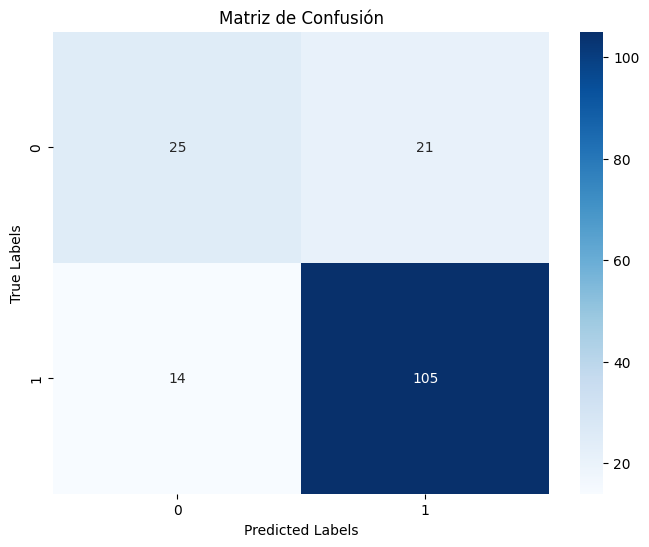

In [42]:
param_grid_knn = {
    'n_neighbors': [3, 5, 7, 9, 11, 15],  # Número de vecinos
    'weights': ['uniform', 'distance'],    # Ponderación de los vecinos
    'metric': ['euclidean', 'manhattan', 'minkowski']  # Métrica de distancia
}

# Definición del modelo
modelo_KNN_CR_grid = KNeighborsClassifier()

# Obtención de la mejor configuración de hiperparámetros del grid, utiliza validación cruzada
modelo_KNN_CR = GridSearchCV(estimator=modelo_KNN_CR_grid,param_grid=param_grid_knn,cv=5)

# Entrenar el modelo
modelo_KNN_CR.fit(X_train_cocheRadarDF_escaladas, y_train_cocheRadarDF)

# Imprimir los mejores hiperparámetros encontrados
print("Mejores hiperparámetros:", modelo_KNN_CR.best_params_)

# Realizar las predicciones
y_pred_train = modelo_KNN_CR.predict(X_train_cocheRadarDF_escaladas)
y_pred = modelo_KNN_CR.predict(X_test_cocheRadarDF_escaladas)

# Calcular las métricas
accuracy = accuracy_score(y_test_cocheRadarDF, y_pred)
f1 = f1_score(y_test_cocheRadarDF, y_pred)
precision = precision_score(y_test_cocheRadarDF, y_pred)
sensibilidad_recall = recall_score(y_test_cocheRadarDF, y_pred)
f1_train = f1_score(y_train_cocheRadarDF, y_pred_train)

# Imprimir los resultados de las métricas
print("F1 Train: " +str(f1_train))
print("F1 Test: " +str(f1))
print("Accuracy: "+str(accuracy))
print("Precision: "+str(precision))
print("Recall: "+str(sensibilidad_recall))

# Mostramos la matriz de confusín (0: coche, 1: otros)
cm = confusion_matrix(y_test_cocheRadarDF, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Matriz de Confusión')
plt.show()

## Modelos después de balancear



#### SMOTE



In [43]:
# Mostramos el dataset desbalanceado
counter = Counter(y_train_cocheRadarDF)
print("Dataset train antes:"+str(counter))
# Aplicamos SMOTE al conjunto de train
oversample = SMOTE()
X_train_CR_SMOTE, y_train_CR_SMOTE = oversample.fit_resample(X_train_cocheRadarDF, y_train_cocheRadarDF)
# Mostramos el dataset tras el balanceo
counter = Counter(y_train_CR_SMOTE)
print("Dataset train después:"+str(counter))

# Normilizamos el conjunto de entrenamiento
scaler = StandardScaler()
# Ajustamos el escalador con los datos de entrenamiento y los escalamos
X_train_CR_SMOTE_escaladas = pd.DataFrame(scaler.fit_transform(X_train_CR_SMOTE), columns=X_train_CR_SMOTE.columns)

Dataset train antes:Counter({1: 494, 0: 165})
Dataset train después:Counter({1: 494, 0: 494})


##### SMOTE: SVM



/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  w

Mejores hiperparámetros: {'C': 1, 'loss': 'squared_hinge', 'max_iter': 1000}
F1 Train: 0.8402116402116402
F1 Test: 0.7920792079207921
Accuracy: 0.7454545454545455
Precision: 0.963855421686747
Recall: 0.6722689075630253


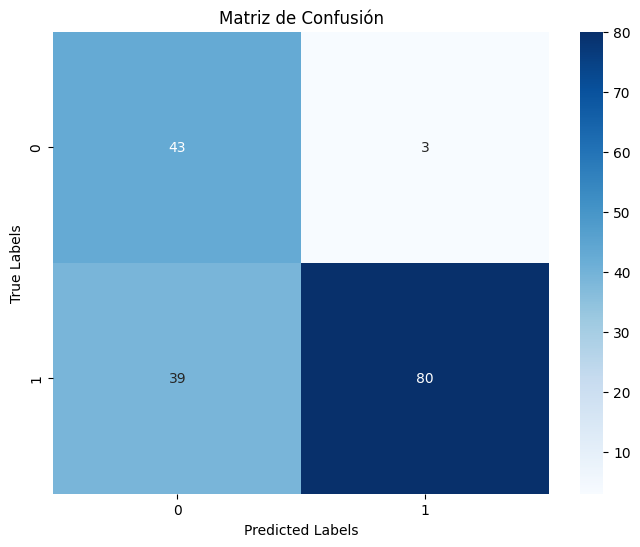

In [44]:
param_grid_SVM_CR = {
    'C': [0.1,1],  # Regularización
    'loss': ['hinge', 'squared_hinge'],  # Función de pérdida
    'max_iter': [1000, 5000, 10000, 50000]  # Número máximo de iteraciones
}

# Definición del modelo
modelo_SVM_SMOTE_CR_grid = LinearSVC(random_state=semilla)

# Obtención de la mejor configuración de hiperparámetros del grid, utiliza validación cruzada
modelo_SVM_SMOTE_CR = GridSearchCV(estimator=modelo_SVM_SMOTE_CR_grid, param_grid=param_grid_SVM_CR, cv=5)

# Entrenar el modelo
modelo_SVM_SMOTE_CR.fit(X_train_CR_SMOTE_escaladas, y_train_CR_SMOTE)

# Imprimir los mejores hiperparámetros encontrados
print("Mejores hiperparámetros:", modelo_SVM_SMOTE_CR.best_params_)

# Realizar las predicciones
y_pred_train = modelo_SVM_SMOTE_CR.predict(X_train_CR_SMOTE_escaladas)
y_pred = modelo_SVM_SMOTE_CR.predict(X_test_cocheRadarDF_escaladas)

# Calcular las métricas
accuracy = accuracy_score(y_test_cocheRadarDF, y_pred)
f1 = f1_score(y_test_cocheRadarDF, y_pred)
precision = precision_score(y_test_cocheRadarDF, y_pred)
sensibilidad_recall = recall_score(y_test_cocheRadarDF, y_pred)
f1_train = f1_score(y_train_CR_SMOTE, y_pred_train)

# Imprimir los resultados de las métricas
print("F1 Train: " +str(f1_train))
print("F1 Test: " +str(f1))
print("Accuracy: "+str(accuracy))
print("Precision: "+str(precision))
print("Recall: "+str(sensibilidad_recall))

# Mostramos la matriz de confusín (0: coche, 1: otros)
cm = confusion_matrix(y_test_cocheRadarDF, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Matriz de Confusión')
plt.show()

##### SMOTE: Árbol de decisión



Mejores hiperparámetros: {'criterion': 'gini', 'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2}
F1 Train: 0.9491525423728814
F1 Test: 0.8093023255813954
Accuracy: 0.7515151515151515
Precision: 0.90625
Recall: 0.7310924369747899


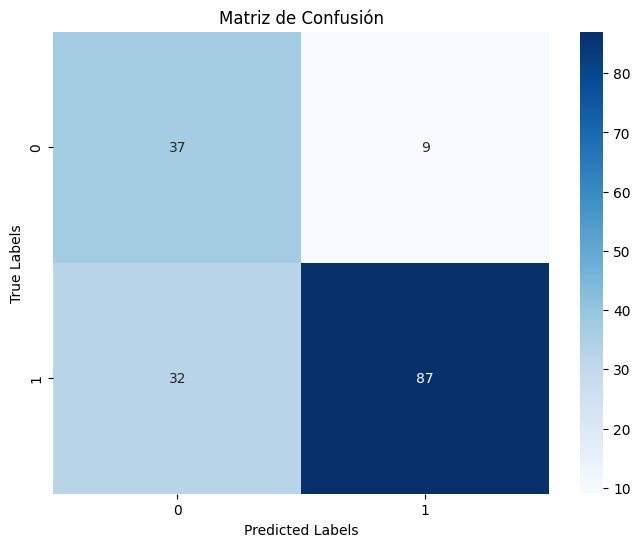

In [45]:
param_grid_AD = {
    'criterion': ['gini', 'entropy'],  # Criterio
    'max_depth': [None, 5,10],  # Profundidad máxima
    'min_samples_split': [2, 5, 10],  # Muestras mínimas para dividir un nodo
    'min_samples_leaf': [1, 2, 5, 10]  # Muestras mínimas que debe tener el nodo hoja
}

# Definición del modelo
modelo_AD_SMOTE_CR_grid = DecisionTreeClassifier(random_state=semilla)

# Obtención de la mejor configuración de hiperparámetros del grid, utiliza validación cruzada
modelo_AD_SMOTE_CR = GridSearchCV(estimator=modelo_AD_SMOTE_CR_grid,param_grid=param_grid_AD,cv=5)

# Entrenar el modelo
modelo_AD_SMOTE_CR.fit(X_train_CR_SMOTE_escaladas, y_train_CR_SMOTE)

# Imprimir los mejores hiperparámetros encontrados
print("Mejores hiperparámetros:", modelo_AD_SMOTE_CR.best_params_)

# Realizar las predicciones
y_pred_train = modelo_AD_SMOTE_CR.predict(X_train_CR_SMOTE_escaladas)
y_pred = modelo_AD_SMOTE_CR.predict(X_test_cocheRadarDF_escaladas)

# Calcular las métricas
accuracy = accuracy_score(y_test_cocheRadarDF, y_pred)
f1 = f1_score(y_test_cocheRadarDF, y_pred)
precision = precision_score(y_test_cocheRadarDF, y_pred)
sensibilidad_recall = recall_score(y_test_cocheRadarDF, y_pred)
f1_train = f1_score(y_train_CR_SMOTE, y_pred_train)

# Imprimir los resultados de las métricas
print("F1 Train: " +str(f1_train))
print("F1 Test: " +str(f1))
print("Accuracy: "+str(accuracy))
print("Precision: "+str(precision))
print("Recall: "+str(sensibilidad_recall))

# Mostramos la matriz de confusín (0: coche, 1: otros)
cm = confusion_matrix(y_test_cocheRadarDF, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Matriz de Confusión')
plt.show()

##### SMOTE: Red neuronal



/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:545: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:545: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:545: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS R

Mejores hiperparámetros: {'activation': 'logistic', 'hidden_layer_sizes': 5, 'max_iter': 500, 'solver': 'lbfgs'}
F1 Train: 0.9480249480249481
F1 Test: 0.8738738738738738
Accuracy: 0.8303030303030303
Precision: 0.941747572815534
Recall: 0.8151260504201681


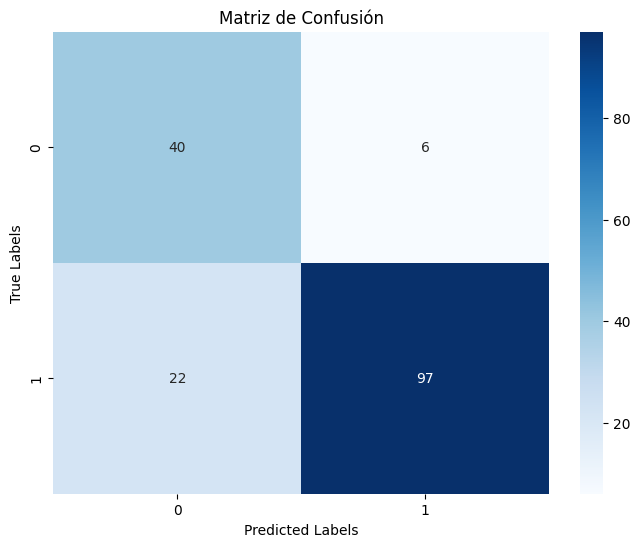

In [46]:
param_grid_RN = {
    'hidden_layer_sizes': [5],  # Capa oculta
    'activation': ['logistic'],  # Función de activación
    'solver': ['lbfgs'],  # Método de optimización
    'max_iter': [500]  # Número máximo de iteraciones
}

# Definición del modelo
modelo_RN_SMOTE_CR_grid = MLPClassifier(random_state=semilla)

# Obtención de la mejor configuración de hiperparámetros del grid, utiliza validación cruzada
modelo_RN_SMOTE_CR = GridSearchCV(estimator=modelo_RN_SMOTE_CR_grid,param_grid=param_grid_RN,cv=5)

# Entrenar el modelo
modelo_RN_SMOTE_CR.fit(X_train_CR_SMOTE_escaladas, y_train_CR_SMOTE)

# Imprimir los mejores hiperparámetros encontrados
print("Mejores hiperparámetros:", modelo_RN_SMOTE_CR.best_params_)

# Realizar las predicciones
y_pred_train = modelo_RN_SMOTE_CR.predict(X_train_CR_SMOTE_escaladas)
y_pred = modelo_RN_SMOTE_CR.predict(X_test_cocheRadarDF_escaladas)

# Calcular las métricas
accuracy = accuracy_score(y_test_cocheRadarDF, y_pred)
f1 = f1_score(y_test_cocheRadarDF, y_pred)
precision = precision_score(y_test_cocheRadarDF, y_pred)
sensibilidad_recall = recall_score(y_test_cocheRadarDF, y_pred)
f1_train = f1_score(y_train_CR_SMOTE, y_pred_train)

# Imprimir los resultados de las métricas
print("F1 Train: " +str(f1_train))
print("F1 Test: " +str(f1))
print("Accuracy: "+str(accuracy))
print("Precision: "+str(precision))
print("Recall: "+str(sensibilidad_recall))

# Mostramos la matriz de confusín (0: coche, 1: otros)
cm = confusion_matrix(y_test_cocheRadarDF, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Matriz de Confusión')
plt.show()

##### SMOTE: K\-Vecinos



Mejores hiperparámetros: {'metric': 'euclidean', 'n_neighbors': 3, 'weights': 'distance'}
F1 Train: 1.0
F1 Test: 0.8115942028985508
Accuracy: 0.7636363636363637
Precision: 0.9545454545454546
Recall: 0.7058823529411765


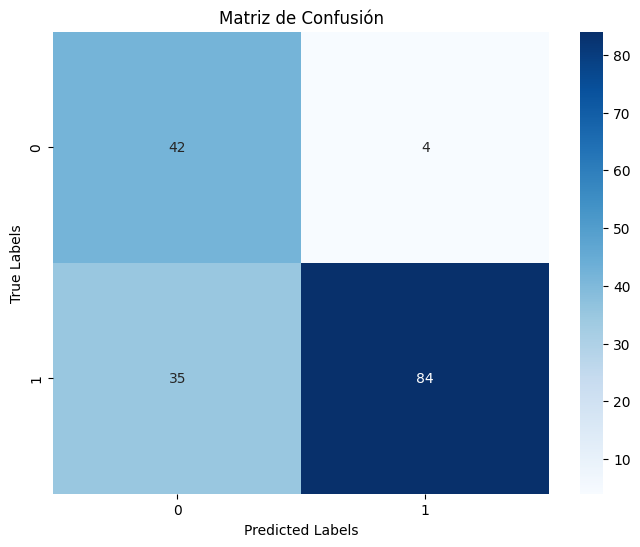

In [47]:
param_grid_knn = {
    'n_neighbors': [3, 5, 7, 9, 11, 15],  # Número de vecinos
    'weights': ['uniform', 'distance'],    # Ponderación de los vecinos
    'metric': ['euclidean', 'minkowski']  # Métrica de distancia
}

# Definición del modelo
modelo_KNN_SMOTE_CR_grid = KNeighborsClassifier()

# Obtención de la mejor configuración de hiperparámetros del grid, utiliza validación cruzada
modelo_KNN_SMOTE_CR = GridSearchCV(estimator=modelo_KNN_SMOTE_CR_grid,param_grid=param_grid_knn,cv=5)

# Entrenar el modelo
modelo_KNN_SMOTE_CR.fit(X_train_CR_SMOTE_escaladas, y_train_CR_SMOTE)

# Imprimir los mejores hiperparámetros encontrados
print("Mejores hiperparámetros:", modelo_KNN_SMOTE_CR.best_params_)

# Realizar las predicciones
y_pred_train = modelo_KNN_SMOTE_CR.predict(X_train_CR_SMOTE_escaladas)
y_pred = modelo_KNN_SMOTE_CR.predict(X_test_cocheRadarDF_escaladas)

# Calcular las métricas
accuracy = accuracy_score(y_test_cocheRadarDF, y_pred)
f1 = f1_score(y_test_cocheRadarDF, y_pred)
precision = precision_score(y_test_cocheRadarDF, y_pred)
sensibilidad_recall = recall_score(y_test_cocheRadarDF, y_pred)
f1_train = f1_score(y_train_CR_SMOTE, y_pred_train)

# Imprimir los resultados de las métricas
print("F1 Train: " +str(f1_train))
print("F1 Test: " +str(f1))
print("Accuracy: "+str(accuracy))
print("Precision: "+str(precision))
print("Recall: "+str(sensibilidad_recall))

# Mostramos la matriz de confusín (0: coche, 1: otros)
cm = confusion_matrix(y_test_cocheRadarDF, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Matriz de Confusión')
plt.show()

#### Borderline\-SMOTE



In [48]:
# Mostramos el dataset desbalanceado
counter = Counter(y_train_cocheRadarDF)
print("Dataset train antes:"+str(counter))
# Aplicamos Borderline-SMOTE al conjunto de train
oversample = BorderlineSMOTE()
X_train_CR_B_SMOTE, y_train_CR_B_SMOTE = oversample.fit_resample(X_train_cocheRadarDF, y_train_cocheRadarDF)
# Mostramos el dataset tras el balanceo
counter = Counter(y_train_CR_B_SMOTE)
print("Dataset train después:"+str(counter))

# Normilizamos el conjunto de entrenamiento
scaler = StandardScaler()
# Ajustamos el escalador con los datos de entrenamiento y los escalamos
X_train_CR_B_SMOTE_escaladas = pd.DataFrame(scaler.fit_transform(X_train_CR_B_SMOTE), columns=X_train_CR_B_SMOTE.columns)

Dataset train antes:Counter({1: 494, 0: 165})
Dataset train después:Counter({1: 494, 0: 494})


##### Borderline\-SMOTE: SVM



/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  w

Mejores hiperparámetros: {'C': 1, 'loss': 'hinge'}
F1 Train: 0.844017094017094
F1 Test: 0.801980198019802
Accuracy: 0.7575757575757576
Precision: 0.9759036144578314
Recall: 0.680672268907563


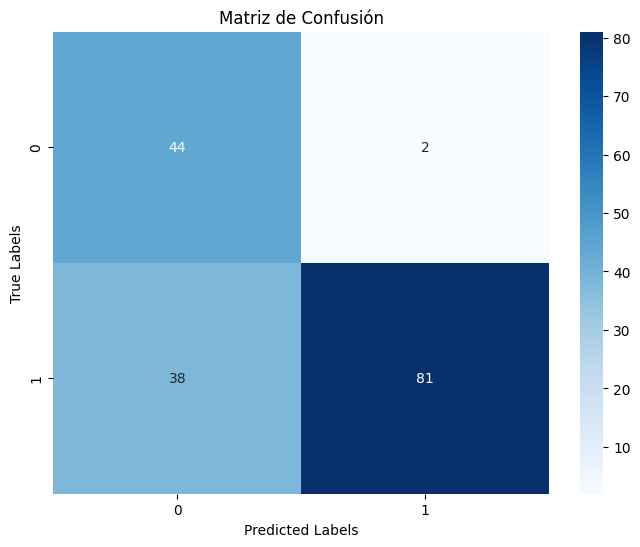

In [49]:
param_grid_SVM_CR = {
    'C': [0.1, 1, 10, 100, 300],  # Regularización
    'loss': ['hinge', 'squared_hinge'] # Función de pérdida
}

# Definición del modelo
modelo_SVM_B_SMOTE_CR_grid = LinearSVC(random_state=semilla)

# Obtención de la mejor configuración de hiperparámetros del grid, utiliza validación cruzada
modelo_SVM_B_SMOTE_CR = GridSearchCV(estimator=modelo_SVM_B_SMOTE_CR_grid, param_grid=param_grid_SVM_CR, cv=5)

# Entrenar el modelo
modelo_SVM_B_SMOTE_CR.fit(X_train_CR_B_SMOTE_escaladas, y_train_CR_B_SMOTE)

# Imprimir los mejores hiperparámetros encontrados
print("Mejores hiperparámetros:", modelo_SVM_B_SMOTE_CR.best_params_)

# Realizar las predicciones
y_pred_train = modelo_SVM_B_SMOTE_CR.predict(X_train_CR_B_SMOTE_escaladas)
y_pred = modelo_SVM_B_SMOTE_CR.predict(X_test_cocheRadarDF_escaladas)

# Calcular las métricas
accuracy = accuracy_score(y_test_cocheRadarDF, y_pred)
f1 = f1_score(y_test_cocheRadarDF, y_pred)
precision = precision_score(y_test_cocheRadarDF, y_pred)
sensibilidad_recall = recall_score(y_test_cocheRadarDF, y_pred)
f1_train = f1_score(y_train_CR_B_SMOTE, y_pred_train)

# Imprimir los resultados de las métricas
print("F1 Train: " +str(f1_train))
print("F1 Test: " +str(f1))
print("Accuracy: "+str(accuracy))
print("Precision: "+str(precision))
print("Recall: "+str(sensibilidad_recall))

# Mostramos la matriz de confusín (0: coche, 1: otros)
cm = confusion_matrix(y_test_cocheRadarDF, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Matriz de Confusión')
plt.show()

##### Borderline\-SMOTE: Árbol de decisión



Mejores hiperparámetros: {'criterion': 'entropy', 'max_depth': 15, 'min_samples_leaf': 3, 'min_samples_split': 2}
F1 Train: 0.9615384615384616
F1 Test: 0.7511737089201878
Accuracy: 0.6787878787878788
Precision: 0.851063829787234
Recall: 0.6722689075630253


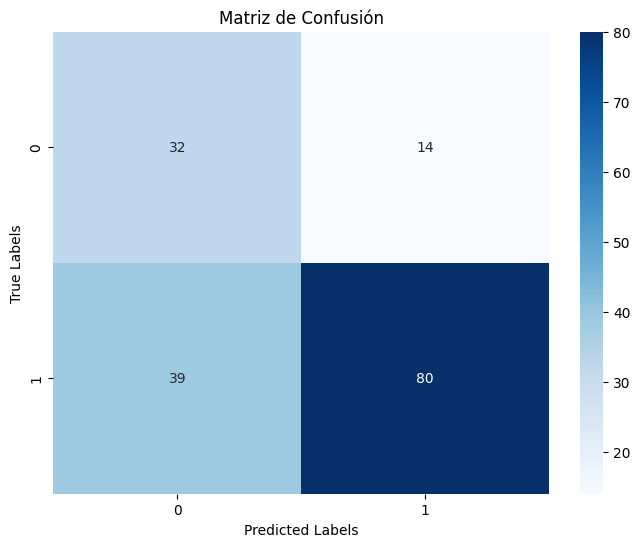

In [50]:
param_grid_AD = {
    'criterion': ['gini', 'entropy'],  # Criterio
    'max_depth': [15],  # Profundidad máxima
    'min_samples_split': [2,3, 5, 10],  # Muestras mínimas para dividir un nodo
    'min_samples_leaf': [1, 2, 3,5, 10]  # Muestras mínimas que debe tener el nodo hoja
}

# Definición del modelo
modelo_AD_B_SMOTE_CR_grid = DecisionTreeClassifier(random_state=semilla)

# Obtención de la mejor configuración de hiperparámetros del grid, utiliza validación cruzada
modelo_AD_B_SMOTE_CR = GridSearchCV(estimator=modelo_AD_B_SMOTE_CR_grid,param_grid=param_grid_AD,cv=5)

# Entrenar el modelo
modelo_AD_B_SMOTE_CR.fit(X_train_CR_B_SMOTE_escaladas, y_train_CR_B_SMOTE)

# Imprimir los mejores hiperparámetros encontrados
print("Mejores hiperparámetros:", modelo_AD_B_SMOTE_CR.best_params_)

# Realizar las predicciones
y_pred_train = modelo_AD_B_SMOTE_CR.predict(X_train_CR_B_SMOTE_escaladas)
y_pred = modelo_AD_B_SMOTE_CR.predict(X_test_cocheRadarDF_escaladas)

# Calcular las métricas
accuracy = accuracy_score(y_test_cocheRadarDF, y_pred)
f1 = f1_score(y_test_cocheRadarDF, y_pred)
precision = precision_score(y_test_cocheRadarDF, y_pred)
sensibilidad_recall = recall_score(y_test_cocheRadarDF, y_pred)
f1_train = f1_score(y_train_CR_B_SMOTE, y_pred_train)

# Imprimir los resultados de las métricas
print("F1 Train: " +str(f1_train))
print("F1 Test: " +str(f1))
print("Accuracy: "+str(accuracy))
print("Precision: "+str(precision))
print("Recall: "+str(sensibilidad_recall))

# Mostramos la matriz de confusín (0: coche, 1: otros)
cm = confusion_matrix(y_test_cocheRadarDF, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Matriz de Confusión')
plt.show()

##### Borderline\-SMOTE: Red neuronal



Mejores hiperparámetros: {'activation': 'logistic', 'hidden_layer_sizes': 16, 'max_iter': 500, 'solver': 'lbfgs'}
F1 Train: 0.9989868287740629
F1 Test: 0.8878923766816144
Accuracy: 0.8484848484848485
Precision: 0.9519230769230769
Recall: 0.8319327731092437


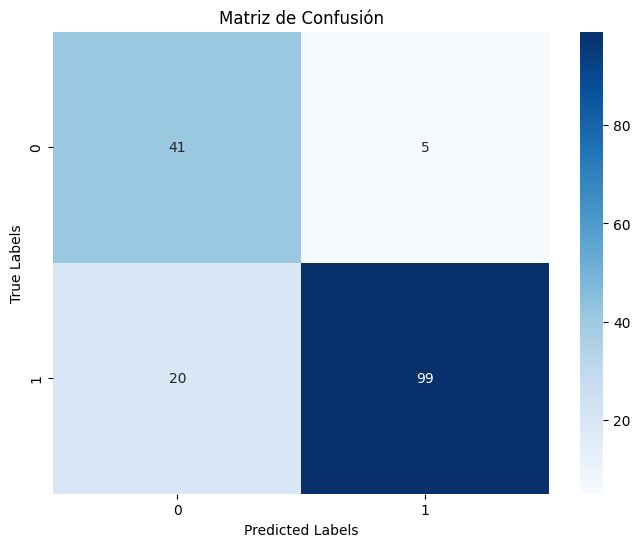

In [51]:
param_grid_RN = {
    'hidden_layer_sizes': [16],  # Capa oculta
    'activation': ['logistic'],  # Función de activación
    'solver': ['lbfgs'],  # Método de optimización
    'max_iter': [500]  # Número máximo de iteraciones
}

# Definición del modelo
modelo_RN_B_SMOTE_CR_grid = MLPClassifier(random_state=semilla)

# Obtención de la mejor configuración de hiperparámetros del grid, utiliza validación cruzada
modelo_RN_B_SMOTE_CR = GridSearchCV(estimator=modelo_RN_B_SMOTE_CR_grid,param_grid=param_grid_RN,cv=5)

# Entrenar el modelo
modelo_RN_B_SMOTE_CR.fit(X_train_CR_B_SMOTE_escaladas, y_train_CR_B_SMOTE)

# Imprimir los mejores hiperparámetros encontrados
print("Mejores hiperparámetros:", modelo_RN_B_SMOTE_CR.best_params_)

# Realizar las predicciones
y_pred_train = modelo_RN_B_SMOTE_CR.predict(X_train_CR_B_SMOTE_escaladas)
y_pred = modelo_RN_B_SMOTE_CR.predict(X_test_cocheRadarDF_escaladas)

# Calcular las métricas
accuracy = accuracy_score(y_test_cocheRadarDF, y_pred)
f1 = f1_score(y_test_cocheRadarDF, y_pred)
precision = precision_score(y_test_cocheRadarDF, y_pred)
sensibilidad_recall = recall_score(y_test_cocheRadarDF, y_pred)
f1_train = f1_score(y_train_CR_B_SMOTE, y_pred_train)

# Imprimir los resultados de las métricas
print("F1 Train: " +str(f1_train))
print("F1 Test: " +str(f1))
print("Accuracy: "+str(accuracy))
print("Precision: "+str(precision))
print("Recall: "+str(sensibilidad_recall))

# Mostramos la matriz de confusín (0: coche, 1: otros)
cm = confusion_matrix(y_test_cocheRadarDF, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Matriz de Confusión')
plt.show()

##### Borderline\-SMOTE: K\-Vecinos



Mejores hiperparámetros: {'metric': 'euclidean', 'n_neighbors': 6, 'weights': 'distance'}
F1 Train: 1.0
F1 Test: 0.7821782178217822
Accuracy: 0.7333333333333333
Precision: 0.9518072289156626
Recall: 0.6638655462184874


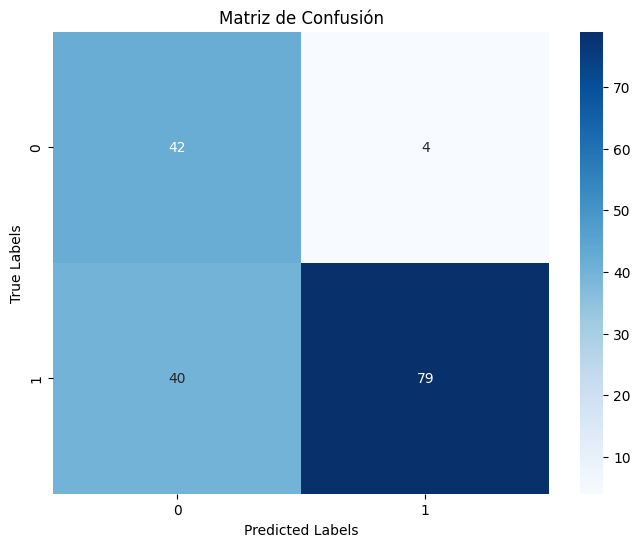

In [52]:
param_grid_knn = {
    'n_neighbors': [6, 7, 9, 11, 15],  # Número de vecinos
    'weights': ['uniform', 'distance'],    # Ponderación de los vecinos
    'metric': ['euclidean', 'minkowski']  # Métrica de distancia
}

# Definición del modelo
modelo_KNN_B_SMOTE_CR_grid = KNeighborsClassifier()

# Obtención de la mejor configuración de hiperparámetros del grid, utiliza validación cruzada
modelo_KNN_B_SMOTE_CR = GridSearchCV(estimator=modelo_KNN_B_SMOTE_CR_grid,param_grid=param_grid_knn,cv=5)

# Entrenar el modelo
modelo_KNN_B_SMOTE_CR.fit(X_train_CR_B_SMOTE_escaladas, y_train_CR_B_SMOTE)

# Imprimir los mejores hiperparámetros encontrados
print("Mejores hiperparámetros:", modelo_KNN_B_SMOTE_CR.best_params_)

# Realizar las predicciones
y_pred_train = modelo_KNN_B_SMOTE_CR.predict(X_train_CR_B_SMOTE_escaladas)
y_pred = modelo_KNN_B_SMOTE_CR.predict(X_test_cocheRadarDF_escaladas)

# Calcular las métricas
accuracy = accuracy_score(y_test_cocheRadarDF, y_pred)
f1 = f1_score(y_test_cocheRadarDF, y_pred)
precision = precision_score(y_test_cocheRadarDF, y_pred)
sensibilidad_recall = recall_score(y_test_cocheRadarDF, y_pred)
f1_train = f1_score(y_train_CR_B_SMOTE, y_pred_train)

# Imprimir los resultados de las métricas
print("F1 Train: " +str(f1_train))
print("F1 Test: " +str(f1))
print("Accuracy: "+str(accuracy))
print("Precision: "+str(precision))
print("Recall: "+str(sensibilidad_recall))
# Mostramos la matriz de confusín (0: coche, 1: otros)
cm = confusion_matrix(y_test_cocheRadarDF, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Matriz de Confusión')
plt.show()

#### ADASYN



In [53]:
# Mostramos el dataset desbalanceado
counter = Counter(y_train_cocheRadarDF)
print("Dataset train antes:"+str(counter))
# Aplicamos ADASYN al conjunto de train
oversample = ADASYN()
X_train_CR_ADASYN, y_train_CR_ADASYN = oversample.fit_resample(X_train_cocheRadarDF, y_train_cocheRadarDF)
# Mostramos el dataset tras el balanceo
counter = Counter(y_train_CR_ADASYN)
print("Dataset train después:"+str(counter))

# Normilizamos el conjunto de entrenamiento
scaler = StandardScaler()
# Ajustamos el escalador con los datos de entrenamiento y los escalamos
X_train_CR_ADASYN_escaladas = pd.DataFrame(scaler.fit_transform(X_train_CR_ADASYN), columns=X_train_CR_ADASYN.columns)

Dataset train antes:Counter({1: 494, 0: 165})
Dataset train después:Counter({1: 494, 0: 480})


##### ADASYN: SVM



/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  w

Mejores hiperparámetros: {'C': 0.1, 'loss': 'squared_hinge'}
F1 Train: 0.8352570828961176
F1 Test: 0.7980295566502463
Accuracy: 0.7515151515151515
Precision: 0.9642857142857143
Recall: 0.680672268907563


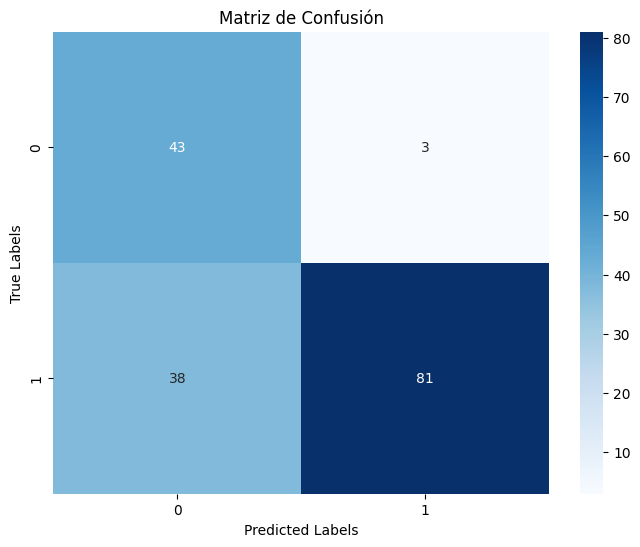

In [54]:
param_grid_SVM_CR = {
    'C': [0.1, 1, 10, 100, 300],  # Regularización
    'loss': ['hinge', 'squared_hinge'] # Función de pérdida
}

# Definición del modelo
modelo_SVM_ADASYN_CR_grid = LinearSVC(random_state=semilla)

# Obtención de la mejor configuración de hiperparámetros del grid, utiliza validación cruzada
modelo_SVM_ADASYN_CR = GridSearchCV(estimator=modelo_SVM_ADASYN_CR_grid, param_grid=param_grid_SVM_CR, cv=5)

# Entrenar el modelo
modelo_SVM_ADASYN_CR.fit(X_train_CR_ADASYN_escaladas, y_train_CR_ADASYN)

# Imprimir los mejores hiperparámetros encontrados
print("Mejores hiperparámetros:", modelo_SVM_ADASYN_CR.best_params_)

# Realizar las predicciones
y_pred_train = modelo_SVM_ADASYN_CR.predict(X_train_CR_ADASYN_escaladas)
y_pred = modelo_SVM_ADASYN_CR.predict(X_test_cocheRadarDF_escaladas)

# Calcular las métricas
accuracy = accuracy_score(y_test_cocheRadarDF, y_pred)
f1 = f1_score(y_test_cocheRadarDF, y_pred)
precision = precision_score(y_test_cocheRadarDF, y_pred)
sensibilidad_recall = recall_score(y_test_cocheRadarDF, y_pred)
f1_train = f1_score(y_train_CR_ADASYN, y_pred_train)


# Imprimir los resultados de las métricas
print("F1 Train: " +str(f1_train))
print("F1 Test: " +str(f1))
print("Accuracy: "+str(accuracy))
print("Precision: "+str(precision))
print("Recall: "+str(sensibilidad_recall))

# Mostramos la matriz de confusín (0: coche, 1: otros)
cm = confusion_matrix(y_test_cocheRadarDF, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Matriz de Confusión')
plt.show()

##### ADASYN: Árbol de decisión



Mejores hiperparámetros: {'criterion': 'entropy', 'max_depth': 10}
F1 Train: 0.9482576557550159
F1 Test: 0.7961165048543689
Accuracy: 0.7454545454545455
Precision: 0.9425287356321839
Recall: 0.6890756302521008


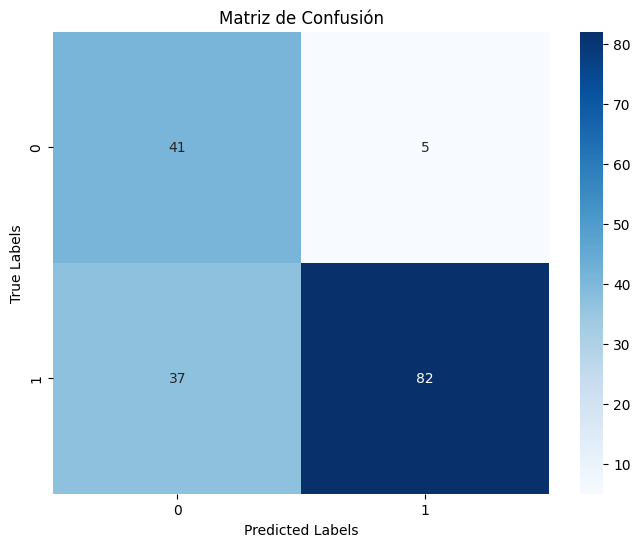

In [55]:
param_grid_AD = {
    'criterion': ['gini', 'entropy'],  # Criterio
    'max_depth': [10]  # Profundidad máxima
}

# Definición del modelo
modelo_AD_ADASYN_CR_grid = DecisionTreeClassifier(random_state=semilla)

# Obtención de la mejor configuración de hiperparámetros del grid, utiliza validación cruzada
modelo_AD_ADASYN_CR = GridSearchCV(estimator=modelo_AD_ADASYN_CR_grid,param_grid=param_grid_AD,cv=5)

# Entrenar el modelo
modelo_AD_ADASYN_CR.fit(X_train_CR_ADASYN_escaladas, y_train_CR_ADASYN)

# Imprimir los mejores hiperparámetros encontrados
print("Mejores hiperparámetros:", modelo_AD_ADASYN_CR.best_params_)

# Realizar las predicciones
y_pred_train = modelo_AD_ADASYN_CR.predict(X_train_CR_ADASYN_escaladas)
y_pred = modelo_AD_ADASYN_CR.predict(X_test_cocheRadarDF_escaladas)

# Calcular las métricas
accuracy = accuracy_score(y_test_cocheRadarDF, y_pred)
f1 = f1_score(y_test_cocheRadarDF, y_pred)
precision = precision_score(y_test_cocheRadarDF, y_pred)
sensibilidad_recall = recall_score(y_test_cocheRadarDF, y_pred)
f1_train = f1_score(y_train_CR_ADASYN, y_pred_train)

# Imprimir los resultados de las métricas
print("F1 Train: " +str(f1_train))
print("F1 Test: " +str(f1))
print("Accuracy: "+str(accuracy))
print("Precision: "+str(precision))
print("Recall: "+str(sensibilidad_recall))

# Mostramos la matriz de confusín (0: coche, 1: otros)
cm = confusion_matrix(y_test_cocheRadarDF, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Matriz de Confusión')
plt.show()

##### ADASYN: Red neuronal



/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:545: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:545: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:545: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS R

Mejores hiperparámetros: {'activation': 'logistic', 'hidden_layer_sizes': 5, 'max_iter': 500, 'solver': 'lbfgs'}
F1 Train: 0.9213483146067416
F1 Test: 0.822429906542056
Accuracy: 0.7696969696969697
Precision: 0.9263157894736842
Recall: 0.7394957983193278


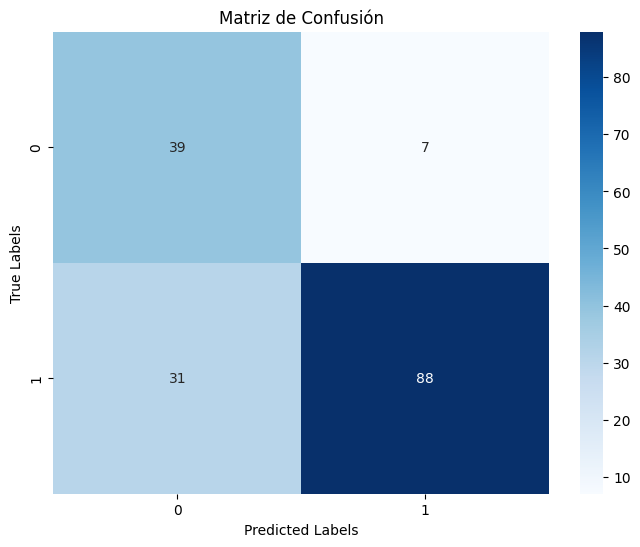

In [56]:
param_grid_RN = {
    'hidden_layer_sizes': [5],  # Capa oculta
    'activation': ['logistic'],  # Función de activación
    'solver': ['lbfgs'],  # Método de optimización
    'max_iter': [500]  # Número máximo de iteraciones
}

# Definición del modelo
modelo_RN_ADASYN_CR_grid = MLPClassifier(random_state=semilla)

# Obtención de la mejor configuración de hiperparámetros del grid, utiliza validación cruzada
modelo_RN_ADASYN_CR = GridSearchCV(estimator=modelo_RN_ADASYN_CR_grid,param_grid=param_grid_RN,cv=5)

# Entrenar el modelo
modelo_RN_ADASYN_CR.fit(X_train_CR_ADASYN_escaladas, y_train_CR_ADASYN)

# Imprimir los mejores hiperparámetros encontrados
print("Mejores hiperparámetros:", modelo_RN_ADASYN_CR.best_params_)

# Realizar las predicciones
y_pred_train = modelo_RN_ADASYN_CR.predict(X_train_CR_ADASYN_escaladas)
y_pred = modelo_RN_ADASYN_CR.predict(X_test_cocheRadarDF_escaladas)

# Calcular las métricas
accuracy = accuracy_score(y_test_cocheRadarDF, y_pred)
f1 = f1_score(y_test_cocheRadarDF, y_pred)
precision = precision_score(y_test_cocheRadarDF, y_pred)
sensibilidad_recall = recall_score(y_test_cocheRadarDF, y_pred)
f1_train = f1_score(y_train_CR_ADASYN, y_pred_train)

# Imprimir los resultados de las métricas
print("F1 Train: " +str(f1_train))
print("F1 Test: " +str(f1))
print("Accuracy: "+str(accuracy))
print("Precision: "+str(precision))
print("Recall: "+str(sensibilidad_recall))

# Mostramos la matriz de confusín (0: coche, 1: otros)
cm = confusion_matrix(y_test_cocheRadarDF, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Matriz de Confusión')
plt.show()

##### ADASYN: K\-Vecinos



/usr/local/lib/python3.10/dist-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


Mejores hiperparámetros: {'metric': 'euclidean', 'n_neighbors': 3, 'weights': 'distance'}
F1 Train: 1.0
F1 Test: 0.7745098039215687
Accuracy: 0.7212121212121212
Precision: 0.9294117647058824
Recall: 0.6638655462184874


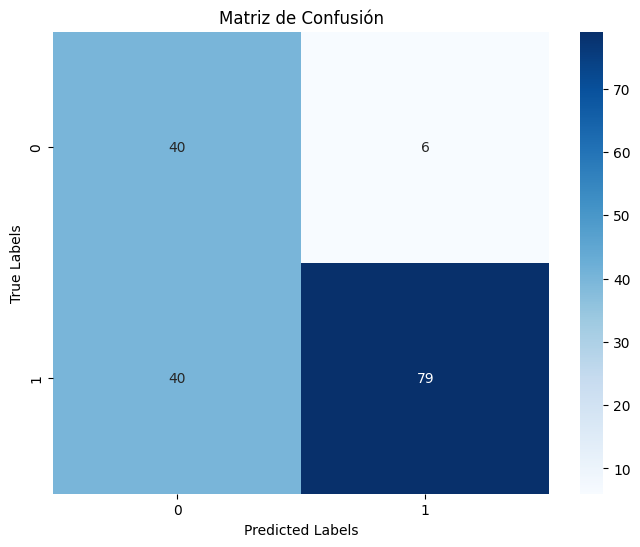

In [57]:
param_grid_knn = {
    'n_neighbors': [3, 9, 11, 15],  # Número de vecinos
    'weights': ['uniform', 'distance'],    # Ponderación de los vecinos
    'metric': ['euclidean', 'minkowski']  # Métrica de distancia
}

# Definición del modelo
modelo_KNN_ADASYN_CR_grid = KNeighborsClassifier()

# Obtención de la mejor configuración de hiperparámetros del grid, utiliza validación cruzada
modelo_KNN_ADASYN_CR = GridSearchCV(estimator=modelo_KNN_ADASYN_CR_grid,param_grid=param_grid_knn,cv=5)

# Entrenar el modelo
modelo_KNN_ADASYN_CR.fit(X_train_CR_ADASYN_escaladas, y_train_CR_ADASYN)

# Imprimir los mejores hiperparámetros encontrados
print("Mejores hiperparámetros:", modelo_KNN_ADASYN_CR.best_params_)

# Realizar las predicciones
y_pred_train = modelo_KNN_ADASYN_CR.predict(X_train_CR_ADASYN_escaladas)
y_pred = modelo_KNN_ADASYN_CR.predict(X_test_cocheRadarDF_escaladas)

# Calcular las métricas
accuracy = accuracy_score(y_test_cocheRadarDF, y_pred)
f1 = f1_score(y_test_cocheRadarDF, y_pred)
precision = precision_score(y_test_cocheRadarDF, y_pred)
sensibilidad_recall = recall_score(y_test_cocheRadarDF, y_pred)
f1_train = f1_score(y_train_CR_ADASYN, y_pred_train)

# Imprimir los resultados de las métricas
print("F1 Train: " +str(f1_train))
print("F1 Test: " +str(f1))
print("Accuracy: "+str(accuracy))
print("Precision: "+str(precision))
print("Recall: "+str(sensibilidad_recall))

# Mostramos la matriz de confusín (0: coche, 1: otros)
cm = confusion_matrix(y_test_cocheRadarDF, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Matriz de Confusión')
plt.show()

##### Borderline\-SMOTE SVM



In [58]:
# Mostramos el dataset desbalanceado
counter = Counter(y_train_cocheRadarDF)
print("Dataset train antes:"+str(counter))
# Aplicamos Borderline-SMOTE SVM al conjunto de train
oversample = SVMSMOTE()
X_train_CR_SMOTESVM, y_train_CR_SMOTESVM = oversample.fit_resample(X_train_cocheRadarDF, y_train_cocheRadarDF)
# Mostramos el dataset tras el balanceo
counter = Counter(y_train_CR_SMOTESVM)
print("Dataset train después:"+str(counter))

# Normilizamos el conjunto de entrenamiento
scaler = StandardScaler()
# Ajustamos el escalador con los datos de entrenamiento y los escalamos
X_train_CR_SMOTESVM_escaladas = pd.DataFrame(scaler.fit_transform(X_train_CR_SMOTESVM), columns=X_train_CR_SMOTESVM.columns)

Dataset train antes:Counter({1: 494, 0: 165})
Dataset train después:Counter({1: 494, 0: 494})


#### Borderline\-SMOTE SVM: SVM



/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  w

Mejores hiperparámetros: {'C': 1, 'loss': 'squared_hinge'}
F1 Train: 0.8257655755015839
F1 Test: 0.78
Accuracy: 0.7333333333333333
Precision: 0.9629629629629629
Recall: 0.6554621848739496


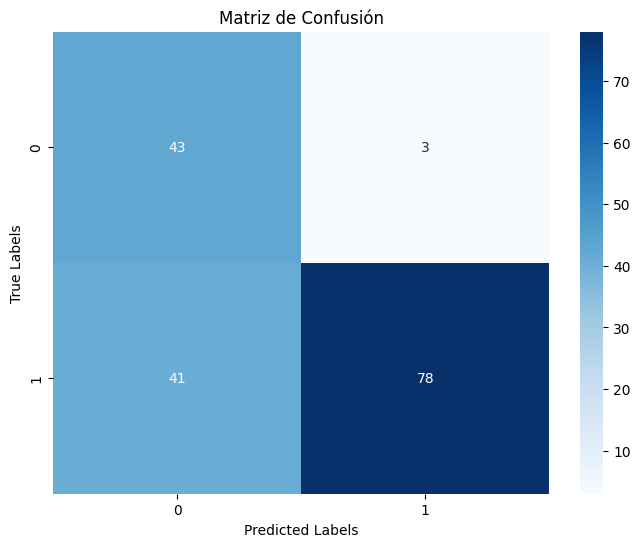

In [59]:
param_grid_SVM_CR = {
    'C': [0.1, 1, 10, 100, 300],  # Regularización
    'loss': ['hinge', 'squared_hinge'] # Función de pérdida
}


# Definición del modelo
modelo_SVM_SMOTESVM_CR_grid = LinearSVC(random_state=semilla)

# Obtención de la mejor configuración de hiperparámetros del grid, utiliza validación cruzada
modelo_SVM_SMOTESVM_CR = GridSearchCV(estimator=modelo_SVM_SMOTESVM_CR_grid, param_grid=param_grid_SVM_CR, cv=5)

# Entrenar el modelo
modelo_SVM_SMOTESVM_CR.fit(X_train_CR_SMOTESVM_escaladas, y_train_CR_SMOTESVM)

# Imprimir los mejores hiperparámetros encontrados
print("Mejores hiperparámetros:", modelo_SVM_SMOTESVM_CR.best_params_)

# Realizar las predicciones
y_pred_train = modelo_SVM_SMOTESVM_CR.predict(X_train_CR_SMOTESVM_escaladas)
y_pred = modelo_SVM_SMOTESVM_CR.predict(X_test_cocheRadarDF_escaladas)

# Calcular las métricas
accuracy = accuracy_score(y_test_cocheRadarDF, y_pred)
f1 = f1_score(y_test_cocheRadarDF, y_pred)
precision = precision_score(y_test_cocheRadarDF, y_pred)
sensibilidad_recall = recall_score(y_test_cocheRadarDF, y_pred)
f1_train = f1_score(y_train_CR_SMOTESVM, y_pred_train)

# Imprimir los resultados de las métricas
print("F1 Train: " +str(f1_train))
print("F1 Test: " +str(f1))
print("Accuracy: "+str(accuracy))
print("Precision: "+str(precision))
print("Recall: "+str(sensibilidad_recall))

# Mostramos la matriz de confusín (0: coche, 1: otros)
cm = confusion_matrix(y_test_cocheRadarDF, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Matriz de Confusión')
plt.show()

##### Borderline\-SMOTE SVM: Árbol de decisión



Mejores hiperparámetros: {'criterion': 'gini', 'max_depth': 12}
F1 Train: 0.9751552795031055
F1 Test: 0.8407079646017699
Accuracy: 0.7818181818181819
Precision: 0.8878504672897196
Recall: 0.7983193277310925


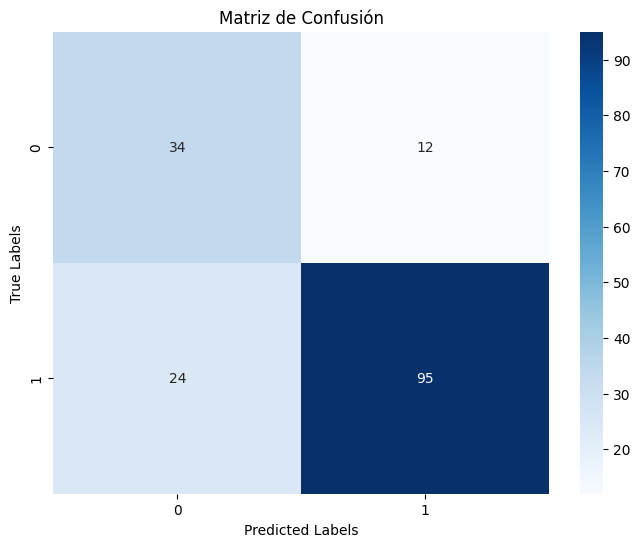

In [60]:
param_grid_AD = {
    'criterion': ['gini'],  # Criterio
    'max_depth': [12]  # Profundidad máxima
}

# Definición del modelo
modelo_AD_SMOTESVM_CR_grid = DecisionTreeClassifier(random_state=semilla)

# Obtención de la mejor configuración de hiperparámetros del grid, utiliza validación cruzada
modelo_AD_SMOTESVM_CR = GridSearchCV(estimator=modelo_AD_SMOTESVM_CR_grid,param_grid=param_grid_AD,cv=5)

# Entrenar el modelo
modelo_AD_SMOTESVM_CR.fit(X_train_CR_SMOTESVM_escaladas, y_train_CR_SMOTESVM)

# Imprimir los mejores hiperparámetros encontrados
print("Mejores hiperparámetros:", modelo_AD_SMOTESVM_CR.best_params_)

# Realizar las predicciones
y_pred_train = modelo_AD_SMOTESVM_CR.predict(X_train_CR_SMOTESVM_escaladas)
y_pred = modelo_AD_SMOTESVM_CR.predict(X_test_cocheRadarDF_escaladas)

# Calcular las métricas
accuracy = accuracy_score(y_test_cocheRadarDF, y_pred)
f1 = f1_score(y_test_cocheRadarDF, y_pred)
precision = precision_score(y_test_cocheRadarDF, y_pred)
sensibilidad_recall = recall_score(y_test_cocheRadarDF, y_pred)
f1_train = f1_score(y_train_CR_SMOTESVM, y_pred_train)

# Imprimir los resultados de las métricas
print("F1 Train: " +str(f1_train))
print("F1 Test: " +str(f1))
print("Accuracy: "+str(accuracy))
print("Precision: "+str(precision))
print("Recall: "+str(sensibilidad_recall))

# Mostramos la matriz de confusín (0: coche, 1: otros)
cm = confusion_matrix(y_test_cocheRadarDF, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Matriz de Confusión')
plt.show()

##### Borderline\-SMOTE SVM: Red neuronal



/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:545: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:545: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Mejores hiperparámetros: {'activation': 'logistic', 'hidden_layer_sizes': 9, 'max_iter': 500, 'solver': 'lbfgs'}
F1 Train: 0.9949135300101729
F1 Test: 0.8648648648648649
Accuracy: 0.8181818181818182
Precision: 0.9320388349514563
Recall: 0.8067226890756303


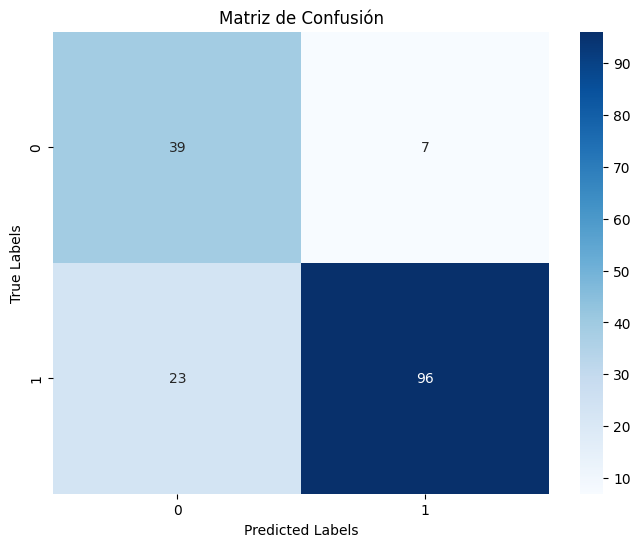

In [61]:
param_grid_RN = {
    'hidden_layer_sizes': [9],  # Capa oculta
    'activation': ['logistic'],  # Función de activación
    'solver': ['lbfgs'],  # Método de optimización
    'max_iter': [500]  # Número máximo de iteraciones
}

# Definición del modelo
modelo_RN_SMOTESVM_CR_grid = MLPClassifier(random_state=semilla)

# Obtención de la mejor configuración de hiperparámetros del grid, utiliza validación cruzada
modelo_RN_SMOTESVM_CR = GridSearchCV(estimator=modelo_RN_SMOTESVM_CR_grid,param_grid=param_grid_RN,cv=5)

# Entrenar el modelo
modelo_RN_SMOTESVM_CR.fit(X_train_CR_SMOTESVM_escaladas, y_train_CR_SMOTESVM)

# Imprimir los mejores hiperparámetros encontrados
print("Mejores hiperparámetros:", modelo_RN_SMOTESVM_CR.best_params_)

# Realizar las predicciones
y_pred_train = modelo_RN_SMOTESVM_CR.predict(X_train_CR_SMOTESVM_escaladas)
y_pred = modelo_RN_SMOTESVM_CR.predict(X_test_cocheRadarDF_escaladas)

# Calcular las métricas
accuracy = accuracy_score(y_test_cocheRadarDF, y_pred)
f1 = f1_score(y_test_cocheRadarDF, y_pred)
precision = precision_score(y_test_cocheRadarDF, y_pred)
sensibilidad_recall = recall_score(y_test_cocheRadarDF, y_pred)
f1_train = f1_score(y_train_CR_SMOTESVM, y_pred_train)

# Imprimir los resultados de las métricas
print("F1 Train: " +str(f1_train))
print("F1 Test: " +str(f1))
print("Accuracy: "+str(accuracy))
print("Precision: "+str(precision))
print("Recall: "+str(sensibilidad_recall))

# Mostramos la matriz de confusín (0: coche, 1: otros)
cm = confusion_matrix(y_test_cocheRadarDF, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Matriz de Confusión')
plt.show()

##### Borderline\-SMOTE SVM: K\-Vecinos



Mejores hiperparámetros: {'metric': 'euclidean', 'n_neighbors': 3, 'weights': 'distance'}
F1 Train: 1.0
F1 Test: 0.7647058823529411
Accuracy: 0.7090909090909091
Precision: 0.9176470588235294
Recall: 0.6554621848739496


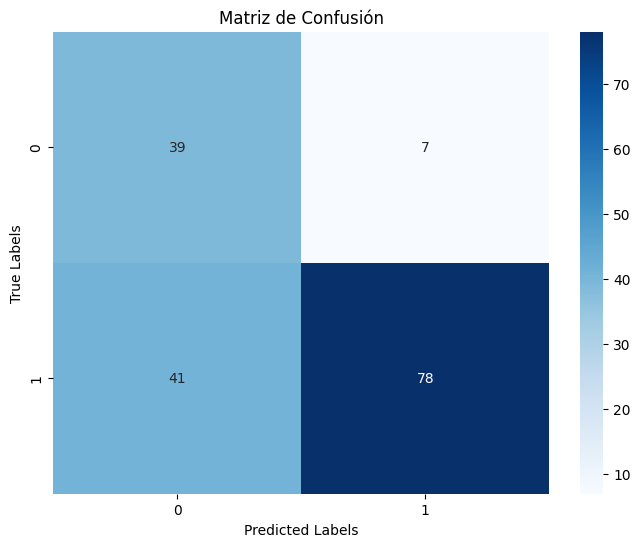

In [62]:
param_grid_knn = {
    'n_neighbors': [3,5,7, 9, 11, 15],  # Número de vecinos
    'weights': ['uniform', 'distance'],    # Ponderación de los vecinos
    'metric': ['euclidean','minkowski']  # Métrica de distancia
}

# Definición del modelo
modelo_KNN_SMOTESVM_CR_grid = KNeighborsClassifier()

# Obtención de la mejor configuración de hiperparámetros del grid, utiliza validación cruzada
modelo_KNN_SMOTESVM_CR = GridSearchCV(estimator=modelo_KNN_SMOTESVM_CR_grid,param_grid=param_grid_knn,cv=5)

# Entrenar el modelo
modelo_KNN_SMOTESVM_CR.fit(X_train_CR_SMOTESVM_escaladas, y_train_CR_SMOTESVM)

# Imprimir los mejores hiperparámetros encontrados
print("Mejores hiperparámetros:", modelo_KNN_SMOTESVM_CR.best_params_)

# Realizar las predicciones
y_pred_train = modelo_KNN_SMOTESVM_CR.predict(X_train_CR_SMOTESVM_escaladas)
y_pred = modelo_KNN_SMOTESVM_CR.predict(X_test_cocheRadarDF_escaladas)

# Calcular las métricas
accuracy = accuracy_score(y_test_cocheRadarDF, y_pred)
f1 = f1_score(y_test_cocheRadarDF, y_pred)
precision = precision_score(y_test_cocheRadarDF, y_pred)
sensibilidad_recall = recall_score(y_test_cocheRadarDF, y_pred)
f1_train = f1_score(y_train_CR_SMOTESVM, y_pred_train)

# Imprimir los resultados de las métricas
print("F1 Train: " +str(f1_train))
print("F1 Test: " +str(f1))
print("Accuracy: "+str(accuracy))
print("Precision: "+str(precision))
print("Recall: "+str(sensibilidad_recall))

# Mostramos la matriz de confusín (0: coche, 1: otros)
cm = confusion_matrix(y_test_cocheRadarDF, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Matriz de Confusión')
plt.show()

## Conclusiones

| Modelo                               | F1_Train | F1_Test | Accuracy | Precision | Recall                              |
|---------------------------------------|-----------|-----------|-------------|-------------|---------------|
| SVM  | 0.88 | 0.85|0.78| 0.84| 0.86|
| Árbol de decisión |0.87 | 0.86|0.78| 0.79| 0.93|
| Red neuronal |0.99 | 0.88|0.83| 0.86| 0.90|
| K-Vecinos |0.88 | 0.85|0.78| 0.83| 0.88|
| SMOTE: SVM  | 0.84 | 0.79|0.74| 0.96| 0.67|
| SMOTE: Árbol de decisión |0.94 | 0.81|0.75| 0.90| 0.73|
| SMOTE: Red neuronal |0.94 | 0.87|0.83| 0.94| 0.81|
| SMOTE: K-Vecinos |1.00 | 0.81|0.76| 0.95| 0.70|
| Borderline_SMOTE: SVM  | 0.84 | 0.80|0.75| 0.97| 0.68|
| Borderline_SMOTE: Árbol de decisión |0.96 | 0.80|0.75| 0.95| 0.69|
| Borderline_SMOTE: Red neuronal |0.99 | 0.89|0.84| 0.95| 0.83|
| Borderline_SMOTE: K-Vecinos |1.00 | 0.78|0.73| 0.95| 0.66|
| ADASYN: SVM  | 0.83 | 0.79|0.75| 0.96| 0.68|
| ADASYN: Árbol de decisión |0.94 | 0.79|0.74| 0.94| 0.68|
| ADASYN: Red neuronal |0.92 | 0.82|0.76| 0.92| 0.73|
| ADASYN: K-Vecinos |1.00 | 0.77|0.72| 0.93| 0.66|
| Borderline_SMOTE SVM: SVM  | 0.82 | 0.78|0.73| 0.96| 0.65|
| Borderline_SMOTE SVM: Árbol de decisión |0.97 | 0.84|0.78| 0.88| 0.79|
| Borderline_SMOTE SVM: Red neuronal |0.99 | 0.86|0.81| 0.93| 0.80|
| Borderline_SMOTE SVM: K-Vecinos |1.00 | 0.76|0.71| 0.91| 0.65|


Una vez obtenidos todos los resultados de las métricas, podemos concluir diversos puntos. El más destacado sería el que la técnica que mejor resultado da por lo general es la de no balancear el dataset. Se puede apreciar que el F1-Score no baja de 0.85. Por otro lado, el mejor modelo la red neuronal con la técnica de balanceo de Borderline_SMOTE, obteniendo un 0.89.

De forma general, podemos ver que los modelos de validación que peores resultados dan son los K-Vecinas las SVM. Dando resultados bastante aceptables los árboles de decisión y siendo las redes neuronales los modelos que tienen mejores resultados con diferencia. No obstante, todos los modelos dan resultados aceptables ya que ninguno baja de 0.76.

Con respecto a las técnicas de balanceo, todas dan resultados más o menos similiares. Aunque, se podría destacar la técnica de Borderline_SMOTE como la que mejores resultados da.

Sobre el overfitting, se puede ver que existe algo de overfitting en los modelos. Algunos son medianamente bajos, pero otros se pueden llegar a considerar altos, destacan los modelos de K-Vecinos al ser los que más overfitting presentan.

Volviendo a la cuestión: _¿Es posible tratar un problema de desbalanceo con técnicas que no tienen en cuenta el desbalanceo?_. La respuesta a este pregunta, como ha quedado demostrado, es sí. Se puede tratar un problema de desbalanceo sin tener el cuenta el desbalanceo, esto se puede ver en los 4 primeros modelos,  donde se puede ver que los resultados obtenidos son bastante buenos.